In [ ]:
! pip install simple_image_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simple_image_download import simple_image_download as simp 
response = simp.simple_image_download

lst=['Deepika_Padukone', 'Anushka_Sharma', 'Katrina_Kaif','Kriti_Sanon','Alia_Bhatt']

for rep in lst:
    response().download(rep +'_face' , 500)

HTTPSConnectionPool(host='jattdisite.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/01/Katrina-Kaif-Face-Closeup.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f56d511bbd0>: Failed to establish a new connection: [Errno 113] No route to host'))


In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('/content/simple_images/Anushka Sharma_face/Anushka Sharma_face_105.jpg')
img.shape

(437, 706, 3)

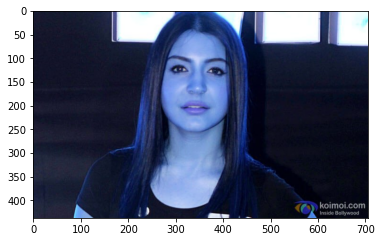

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(437, 706)

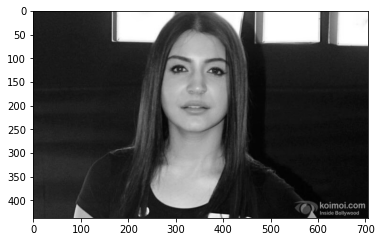

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
!wget https://raw.githubusercontent.com/codebasics/py/master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/codebasics/py/master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml

--2022-10-15 06:21:27--  https://raw.githubusercontent.com/codebasics/py/master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2022-10-15 06:21:28 (15.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-10-15 06:21:28--  https://raw.githubusercontent.com/codebasics/py/master/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Con

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[251,  58, 194, 194]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(251, 58, 194, 194)

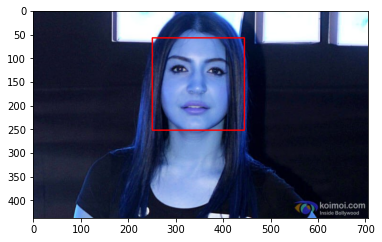

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

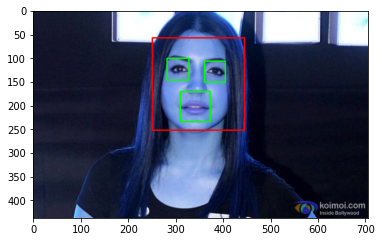

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

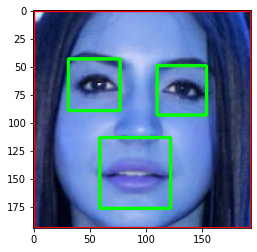

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape


(194, 194, 3)

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

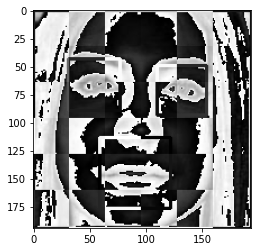

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.3, 5)
      for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
path_to_data = "./simple_images/"
path_to_cr_data = "./simple_images/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['./simple_images/Anushka Sharma_face',
 './simple_images/Alia Bhatt_face',
 './simple_images/Katrina Kaif_face',
 './simple_images/Deepika Padukone_face',
 './simple_images/Kriti Sanon_face']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Anushka Sharma_face
Generating cropped images in folder:  ./simple_images/cropped/Anushka Sharma_face
Alia Bhatt_face
Generating cropped images in folder:  ./simple_images/cropped/Alia Bhatt_face
Katrina Kaif_face
Generating cropped images in folder:  ./simple_images/cropped/Katrina Kaif_face
Deepika Padukone_face
Generating cropped images in folder:  ./simple_images/cropped/Deepika Padukone_face
Kriti Sanon_face
Generating cropped images in folder:  ./simple_images/cropped/Kriti Sanon_face


In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(473, 473, 3)

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Anushka Sharma_face': ['./simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face208.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face287.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face216.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face112.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face102.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face43.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face124.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face215.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face328.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face316.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face89.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face109.png',
  './simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face4

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Anushka Sharma_face': 0,
 'Alia Bhatt_face': 1,
 'Katrina Kaif_face': 2,
 'Deepika Padukone_face': 3,
 'Kriti Sanon_face': 4}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1597, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        74

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.991649,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.987476,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.991649,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

1.0

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

1.0

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[84,  0,  0,  0,  0],
       [ 0, 93,  0,  0,  0],
       [ 0,  0, 79,  0,  0],
       [ 0,  0,  0, 70,  0],
       [ 0,  0,  0,  0, 74]])

Text(69.0, 0.5, 'Truth')

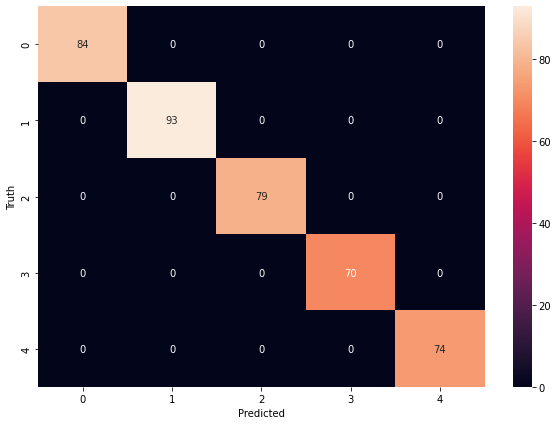

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Anushka Sharma_face': 0,
 'Alia Bhatt_face': 1,
 'Katrina Kaif_face': 2,
 'Deepika Padukone_face': 3,
 'Kriti Sanon_face': 4}

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
!zip -r simple_images.zip simple_images

  adding: simple_images/ (stored 0%)
  adding: simple_images/cropped/ (stored 0%)
  adding: simple_images/cropped/Anushka Sharma_face/ (stored 0%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face208.png (deflated 4%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face287.png (deflated 6%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face216.png (deflated 2%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face112.png (deflated 8%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face102.png (deflated 2%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face43.png (deflated 1%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face124.png (deflated 6%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face215.png (deflated 4%)
  adding: simple_images/cropped/Anushka Sharma_face/Anushka Sharma_face328.png (deflated 6%)
  adding: simple_